In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
dataset_dir = 'C:/Users/sujay/OneDrive/Desktop/Plant/imagedataset/'

In [3]:
IMAGE_SIZE = (256, 256)
BATCH_SIZE = 32

In [4]:
#DATA AUGMENTATION

train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values between 0 and 1
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [5]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "imagedataset",
    shuffle=True,
    image_size=(IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 117 files belonging to 2 classes.


In [6]:
train_ds = dataset.take(20)

In [7]:
data = dataset.skip(20)
val_ds = dataset.take(10)

In [8]:
model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [9]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [10]:
history = model.fit(
    train_ds,
    epochs=10,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds,
)

Epoch 1/10
4/4 [==============================] - 8s 2s/step - loss: 778.5698 - accuracy: 0.4274 - val_loss: 44.6026 - val_accuracy: 0.5128
Epoch 2/10
4/4 [==============================] - 7s 2s/step - loss: 22.9824 - accuracy: 0.5214 - val_loss: 8.0403 - val_accuracy: 0.4872
Epoch 3/10
4/4 [==============================] - 6s 2s/step - loss: 5.2494 - accuracy: 0.5385 - val_loss: 4.2304 - val_accuracy: 0.5128
Epoch 4/10
4/4 [==============================] - 6s 2s/step - loss: 3.3188 - accuracy: 0.6496 - val_loss: 0.5792 - val_accuracy: 0.6154
Epoch 5/10
4/4 [==============================] - 6s 1s/step - loss: 0.3246 - accuracy: 0.8120 - val_loss: 0.1150 - val_accuracy: 0.9573
Epoch 6/10
4/4 [==============================] - 6s 2s/step - loss: 0.6262 - accuracy: 0.7009 - val_loss: 0.0494 - val_accuracy: 0.9658
Epoch 7/10
4/4 [==============================] - 6s 2s/step - loss: 0.2563 - accuracy: 0.8547 - val_loss: 0.0754 - val_accuracy: 0.9573
Epoch 8/10
4/4 [=====================

In [11]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

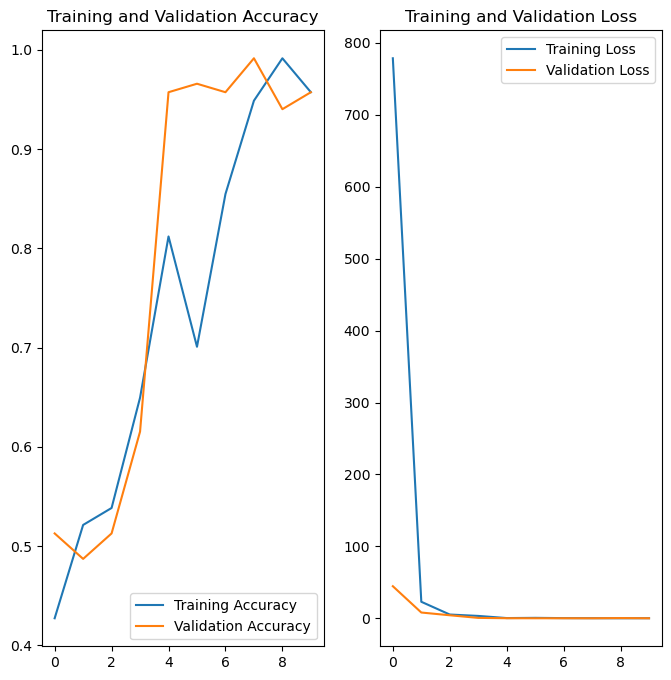

In [12]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(10), acc, label='Training Accuracy')
plt.plot(range(10), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(10), loss, label='Training Loss')
plt.plot(range(10), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:


# Set the path to the training directory
train_dir = 'C:/Users/sujay/OneDrive/Desktop/Plant/imagedataset/'

# Set the image size and batch size
image_size = (256, 256)
batch_size = 32

# Set up the data generator
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values between 0 and 1
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)


# val_datagen = ImageDataGenerator(rescale=1./255)

# val_generator = val_datagen.flow_from_dataframe(
#     dataframe=pd.DataFrame({'image_paths': val_image_paths, 'labels': val_labels}),
#     x_col='image_paths',
#     y_col='labels',
#     target_size=(256, 256),
#     batch_size=32,
#     class_mode='binary'
# )

# Build the CNN model
model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(
    train_generator,
    epochs=10
)

# Save the trained model
model.save('leaf_classification_model.h5')

# Load the saved model
model = tf.keras.models.load_model('leaf_classification_model.h5')

# Path to the input image
input_image_path = 'C:/Users/sujay/OneDrive/Desktop/Project/imagedataset/tulsi/OT-S-010.jpg'

# Load and preprocess the input image
img = image.load_img(input_image_path, target_size=image_size)
img_array = image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)
img_array /= 255.0  # Normalize the pixel values

# Make predictions on the input image
predictions = model.predict(img_array)

# Get the predicted class
predicted_class = 'neem' if predictions[0][0] < 0.5 else 'tulsi'
confidence = round(100 * np.max(predictions[0]), 2)

# Print the predicted class and confidence
print("Predicted Class:", predicted_class)
print("Confidence:", confidence, "%")


# Get the predicted class
predicted_class = 'neem' if predictions[0][0] < 0.5 else 'tulsi'
confidence = round(100 * np.max(predictions[0]), 2)

# Print the predicted class and confidence
print("Predicted Class:", predicted_class)
print("Confidence:", confidence, "%")


In [ ]:
history = model.fit(
    train_generator,
    epochs=10,
    batch_size=32,
    verbose=1
)

In [ ]:
history.history.keys()

In [ ]:


acc = history.history['accuracy']

loss = history.history['loss']

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(10), acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(10), loss, label='Training Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()